In [1]:
# coding: utf-8


# Training 2-hidden layer DNN with 60000 samples as Benchmark
# Activation:relu, Optimizer:rmsprop, nodes: 512/layer, drop out rate: 0.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, RepeatVector
from keras.utils import np_utils
from sklearn.model_selection  import train_test_split
import keras.backend as K
K.set_learning_phase(1)

C:\Users\garga\anaconda3\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [2]:
nb_classes = 10

df=pd.read_csv(r'C:\Users\garga\3D Objects\ELL784 Assn\Assn4\all.csv',header=None)
data_shuffled=df.sample(frac=1).reset_index(drop=True)
features_df=data_shuffled.iloc[:,0:-1]
labels_df=data_shuffled.iloc[:,-1]

# the data, shuffled and split between tran and test sets
X_train_orgin, Y_train_orgin, X_test_orgin, Y_test_orgin = features_df.iloc[:2400,:],labels_df[:2400],features_df.iloc[2400:,:], labels_df[2400:]

X_train = X_train_orgin.astype('float32')
X_test = X_test_orgin.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Y_train = np_utils.to_categorical(Y_train_orgin, nb_classes)
Y_test = np_utils.to_categorical(Y_test_orgin, nb_classes)

Training matrix shape (2400, 784)
Testing matrix shape (600, 784)


In [3]:
Y_train_orgin.shape

(2400,)

In [4]:
Y_train.shape

(2400, 10)

In [5]:
Y_test.shape

(600, 10)

In [6]:
X_test.shape

(600, 784)

In [7]:
Y_test_orgin=np.array(Y_test_orgin).reshape(600,1)

In [8]:
model = Sequential()
#Y_test=Y_test_orgin

#Hidden layer 1
model.add(Dense(512, input_shape=(784,)))
hidden_layer = Activation('relu')
model.add(hidden_layer) 
model.add(Dropout(0.2))  # Dropout helps prevent "overfitting" the training data

#Hidden layer 2
model.add(Dense(512))
hidden_layer_2 = (Activation('relu'))
model.add(hidden_layer_2)
model.add(Dropout(0.2))

#Output Layer
model.add(Dense(10))
model.add(Activation('softmax')) 

#Compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train, batch_size=256, epochs =15,verbose=1)

#Evaluate the model on testing set
score= model.evaluate(X_test,Y_test,verbose=0)
print('Test score:', score[1])

Epoch 1/15
10/10 [==============================] - 1s 12ms/step - loss: 1.5509 - accuracy: 0.5654
Epoch 2/15
10/10 [==============================] - 0s 11ms/step - loss: 0.5697 - accuracy: 0.8346
Epoch 3/15
10/10 [==============================] - 0s 11ms/step - loss: 0.4101 - accuracy: 0.8800
Epoch 4/15
10/10 [==============================] - 0s 11ms/step - loss: 0.3115 - accuracy: 0.9000
Epoch 5/15
10/10 [==============================] - 0s 10ms/step - loss: 0.2510 - accuracy: 0.9250
Epoch 6/15
10/10 [==============================] - 0s 11ms/step - loss: 0.1951 - accuracy: 0.9521
Epoch 7/15
10/10 [==============================] - 0s 11ms/step - loss: 0.1516 - accuracy: 0.9588
Epoch 8/15
10/10 [==============================] - 0s 12ms/step - loss: 0.1180 - accuracy: 0.9717
Epoch 9/15
10/10 [==============================] - 0s 11ms/step - loss: 0.1012 - accuracy: 0.9750
Epoch 10/15
10/10 [==============================] - 0s 11ms/step - loss: 0.0833 - accuracy: 0.9758
Epoch 11/

In [9]:
# In[64]:

# Build DNN model using only 6000 samples FOM:0.0465
# Activation:relu, Optimizer:rmsprop, nodes: 512/layer, drop out rate: 0.1

# Build a subset with only 6000 samples
X_train_subset, X_train_rest, Y_train_subset, Y_train_rest = train_test_split(X_train, Y_train, test_size=0.90, random_state=1)

model2 = Sequential()

#Hidden layer 1
model2.add(Dense(512, input_shape=(784,)))
model2.add(Activation('tanh')) 
model2.add(Dropout(0.1))

#Hidden layer 2
model2.add(Dense(512))
model2.add(Activation('tanh'))
model2.add(Dropout(0.1))

#Output layer
model2.add(Dense(10))
model2.add(Activation('softmax')) 

#Compile model
model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model2.fit(X_train_subset, Y_train_subset, batch_size=256, epochs=15,verbose=1)

#Calculate the FOM
score = model2.evaluate(X_test, Y_test)
fom = len(X_train_subset)/(len(X_train)*2) + (1 - (score[1]))
print ('Test score:', score[1])
print ('FOM: ', fom )

Epoch 1/15
1/1 [==============================] - 1s 519ms/step - loss: 2.3822 - accuracy: 0.1292
Epoch 2/15
1/1 [==============================] - 0s 16ms/step - loss: 2.3043 - accuracy: 0.3458
Epoch 3/15
1/1 [==============================] - 0s 18ms/step - loss: 1.8585 - accuracy: 0.5250
Epoch 4/15
1/1 [==============================] - 0s 17ms/step - loss: 1.5723 - accuracy: 0.6125
Epoch 5/15
1/1 [==============================] - 0s 19ms/step - loss: 0.6737 - accuracy: 0.7958
Epoch 6/15
1/1 [==============================] - 0s 19ms/step - loss: 0.4717 - accuracy: 0.9125
Epoch 7/15
1/1 [==============================] - 0s 17ms/step - loss: 0.4017 - accuracy: 0.9375
Epoch 8/15
1/1 [==============================] - 0s 18ms/step - loss: 0.3760 - accuracy: 0.9333
Epoch 9/15
1/1 [==============================] - 0s 19ms/step - loss: 0.3245 - accuracy: 0.9625
Epoch 10/15
1/1 [==============================] - 0s 17ms/step - loss: 0.3084 - accuracy: 0.9500
Epoch 11/15
1/1 [===========

## 1.1 Using all 784 feature to get the clustering with number of cluster 10

In [10]:
# In[2]:

# K-means Clustering on trainingset with 60000 samples
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection  import train_test_split

#Setting the trainingset
X_km_train = X_train
Y_km_train = Y_train_orgin

#Using PCA to speed up and improve accuracy
#pca = PCA(n_components=10).fit(X_km_train)

#Construct the Kmeans model
km = KMeans( n_clusters=10, n_init=1)
km.fit(X_km_train)

#Determining each cluster represents what digit
validation = pd.DataFrame(X_km_train)
validation['actual'] = Y_km_train
validation['predict'] = km.labels_

from collections import Counter
i = 0
p = 0
q = 0
matrix = pd.DataFrame()
while i < 10:
    count = 0
    num_actual = 0
    numlist = []
    for index, row in validation.iterrows():
        if row['actual'] == i:
            num_actual = num_actual + 1 
            numlist.append(row['predict'])
    label = int(Counter(numlist).most_common()[0][0])
    line = pd.Series([i, label])
    matrix = matrix.append(line,ignore_index=True)
    i = i + 1

#Validating the model
for index, row in matrix.iterrows():
    digit = index
    label = int(row[1])
    n = 0
    m = 0
    for index,row in validation.iterrows():
        if row['actual'] == digit:    
            m += 1
            if row['predict'] == label:
                n += 1
    p = p + n
    q = q + m
    accuracy = float(n)/m
    print( "digit: ", digit, " accuracy: ", accuracy)
accuracy_all = float(p)/q
print ('overall accuracy: ', accuracy_all)

digit:  0  accuracy:  0.5021097046413502
digit:  1  accuracy:  0.9836065573770492
digit:  2  accuracy:  0.7013574660633484
digit:  3  accuracy:  0.6390041493775933
digit:  4  accuracy:  0.576271186440678
digit:  5  accuracy:  0.3601694915254237
digit:  6  accuracy:  0.8054474708171206
digit:  7  accuracy:  0.5
digit:  8  accuracy:  0.5975609756097561
digit:  9  accuracy:  0.4875
overall accuracy:  0.6170833333333333


#### We can see that digit 1 has the highest accuracy among all digits which means digit 1 has very low misclassification rate. Digit 5 and Digit 9 misclassified a lot. We got a overall accuracy of 61%

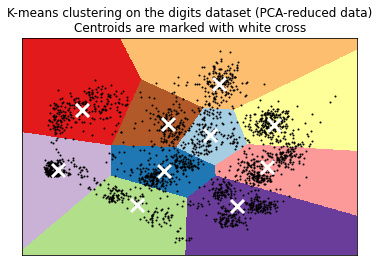

In [11]:
# In[79]:

#Visualization for clusters (Copied from Github)
reduced_data = PCA(n_components=2).fit_transform(X_km_train)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#### For visualization it is important to visualise data using two top feature only. Using principal component analysis top two features are extracted and then centroids are observed.
#### Do we get good clustering? My answer is no as from the data we have not very much defined cluster. It contains lot of noise, which is being get captured by k-means algorithm. For this dataset we can try advanced clustering method like DBSCAN algorithm.

## 1.2 Using all 784 features and number of cluster 5

In [12]:
# In[2]:

# K-means Clustering on trainingset with 60000 samples
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection  import train_test_split

#Setting the trainingset
X_km_train = X_train
Y_km_train = Y_train_orgin

#Using PCA to speed up and improve accuracy
#pca = PCA(n_components=10).fit(X_km_train)

#Construct the Kmeans model
km = KMeans( n_clusters=5, n_init=1)
km.fit(X_km_train)

#Determining each cluster represents what digit
validation = pd.DataFrame(X_km_train)
validation['actual'] = Y_km_train
validation['predict'] = km.labels_

from collections import Counter
i = 0
p = 0
q = 0
matrix = pd.DataFrame()
while i < 10:
    count = 0
    num_actual = 0
    numlist = []
    for index, row in validation.iterrows():
        if row['actual'] == i:
            num_actual = num_actual + 1 
            numlist.append(row['predict'])
    label = int(Counter(numlist).most_common()[0][0])
    line = pd.Series([i, label])
    matrix = matrix.append(line,ignore_index=True)
    i = i + 1

#Validating the model
for index, row in matrix.iterrows():
    digit = index
    label = int(row[1])
    n = 0
    m = 0
    for index,row in validation.iterrows():
        if row['actual'] == digit:    
            m += 1
            if row['predict'] == label:
                n += 1
    p = p + n
    q = q + m
    accuracy = float(n)/m
    print( "digit: ", digit, " accuracy: ", accuracy)
accuracy_all = float(p)/q
print ('overall accuracy: ', accuracy_all)

digit:  0  accuracy:  0.9789029535864979
digit:  1  accuracy:  0.9836065573770492
digit:  2  accuracy:  0.7647058823529411
digit:  3  accuracy:  0.8008298755186722
digit:  4  accuracy:  0.8728813559322034
digit:  5  accuracy:  0.673728813559322
digit:  6  accuracy:  0.8287937743190662
digit:  7  accuracy:  0.9545454545454546
digit:  8  accuracy:  0.5894308943089431
digit:  9  accuracy:  0.9958333333333333
overall accuracy:  0.8445833333333334


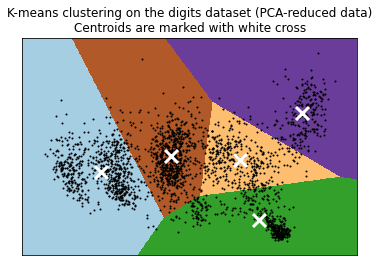

In [13]:
# In[79]:

#Visualization for clusters (Copied from Github)
reduced_data = PCA(n_components=2).fit_transform(X_km_train)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

######  Number of cluster 5 doesnt make any sense because we already know that number of class labels are 10. Also we can see that accuracy get increase from 61% to 84 % as number of cluster get reduced from 10 to 5. As per my interpretation, this doesnt make any sense.

## 2.1 Using 25 features and number of cluster 10

In [14]:
nb_classes = 10

df_25=pd.read_csv(r'C:\Users\garga\3D Objects\ELL784 Assn\Assn2\Part1\feat_25.csv',header=None)
data_shuffled_25=df_25.sample(frac=1).reset_index(drop=True)
features_df_25=data_shuffled_25.iloc[:,0:-1]
labels_df_25=data_shuffled_25.iloc[:,-1]

# the data, shuffled and split between tran and test sets
X_train_orgin_25, Y_train_orgin_25, X_test_orgin_25, Y_test_orgin_25 = features_df_25.iloc[:2400,:],labels_df_25[:2400],features_df_25.iloc[2400:,:], labels_df_25[2400:]

X_train_25 = X_train_orgin_25.astype('float32')
X_test_25 = X_test_orgin_25.astype('float32')
print("Training matrix shape", X_train_25.shape)
print("Testing matrix shape", X_test_25.shape)

Y_train = np_utils.to_categorical(Y_train_orgin_25, nb_classes)
Y_test = np_utils.to_categorical(Y_test_orgin_25, nb_classes)

Training matrix shape (2400, 25)
Testing matrix shape (600, 25)


In [16]:
#Setting the trainingset
X_km_train_25 = X_train_25
Y_km_train_25 = Y_train_orgin_25

#Using PCA to speed up and improve accuracy
#pca = PCA(n_components=10).fit(X_km_train)

#Construct the Kmeans model
km = KMeans(n_clusters=10, n_init=1)
km.fit(X_km_train_25)

#Determining each cluster represents what digit
validation = pd.DataFrame(X_km_train_25)
validation['actual'] = Y_km_train_25
validation['predict'] = km.labels_

from collections import Counter
i = 0
p = 0
q = 0
matrix = pd.DataFrame()
while i < 10:
    count = 0
    num_actual = 0
    numlist = []
    for index, row in validation.iterrows():
        if row['actual'] == i:
            num_actual = num_actual + 1 
            numlist.append(row['predict'])
    label = int(Counter(numlist).most_common()[0][0])
    line = pd.Series([i, label])
    matrix = matrix.append(line,ignore_index=True)
    i = i + 1

#Validating the model
for index, row in matrix.iterrows():
    digit = index
    label = int(row[1])
    n = 0
    m = 0
    for index,row in validation.iterrows():
        if row['actual'] == digit:    
            m += 1
            if row['predict'] == label:
                n += 1
    p = p + n
    q = q + m
    accuracy = float(n)/m
    print( "digit: ", digit, " accuracy: ", accuracy)
accuracy_all = float(p)/q
print ('overall accuracy: ', accuracy_all)

digit:  0  accuracy:  0.5125
digit:  1  accuracy:  0.652542372881356
digit:  2  accuracy:  0.4146341463414634
digit:  3  accuracy:  0.5523012552301255
digit:  4  accuracy:  0.4449152542372881
digit:  5  accuracy:  0.2845528455284553
digit:  6  accuracy:  0.6776859504132231
digit:  7  accuracy:  0.5232067510548524
digit:  8  accuracy:  0.5126050420168067
digit:  9  accuracy:  0.44166666666666665
overall accuracy:  0.5008333333333334


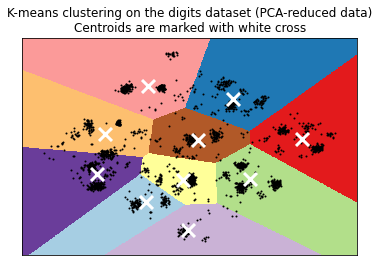

In [17]:
reduced_data = PCA(n_components=2).fit_transform(X_km_train_25)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

##### As the data becomes low dimensional it shows many clusters. For cluster value 10, we get a very poor accuracy of 50% only. May be as number of cluster get increased we get might get good accuracy there.

### 2.2 Using 25 feature and number of cluster 5

In [18]:
X_km_train_25 = X_train_25
Y_km_train_25 = Y_train_orgin_25

#Using PCA to speed up and improve accuracy
#pca = PCA(n_components=10).fit(X_km_train)

#Construct the Kmeans model
km = KMeans(n_clusters=5, n_init=1)
km.fit(X_km_train_25)

#Determining each cluster represents what digit
validation = pd.DataFrame(X_km_train_25)
validation['actual'] = Y_km_train_25
validation['predict'] = km.labels_

from collections import Counter
i = 0
p = 0
q = 0
matrix = pd.DataFrame()
while i < 10:
    count = 0
    num_actual = 0
    numlist = []
    for index, row in validation.iterrows():
        if row['actual'] == i:
            num_actual = num_actual + 1 
            numlist.append(row['predict'])
    label = int(Counter(numlist).most_common()[0][0])
    line = pd.Series([i, label])
    matrix = matrix.append(line,ignore_index=True)
    i = i + 1

#Validating the model
for index, row in matrix.iterrows():
    digit = index
    label = int(row[1])
    n = 0
    m = 0
    for index,row in validation.iterrows():
        if row['actual'] == digit:    
            m += 1
            if row['predict'] == label:
                n += 1
    p = p + n
    q = q + m
    accuracy = float(n)/m
    print( "digit: ", digit, " accuracy: ", accuracy)
accuracy_all = float(p)/q
print ('overall accuracy: ', accuracy_all)

digit:  0  accuracy:  0.9166666666666666
digit:  1  accuracy:  0.6567796610169492
digit:  2  accuracy:  0.8373983739837398
digit:  3  accuracy:  0.698744769874477
digit:  4  accuracy:  0.8432203389830508
digit:  5  accuracy:  0.5121951219512195
digit:  6  accuracy:  0.9710743801652892
digit:  7  accuracy:  0.9873417721518988
digit:  8  accuracy:  0.7058823529411765
digit:  9  accuracy:  0.9541666666666667
overall accuracy:  0.8079166666666666


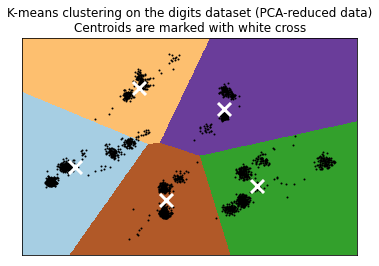

In [23]:
reduced_data = PCA(n_components=2).fit_transform(X_km_train_25)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#### Interpretation

### 3.1 Using 10 feature and number of cluster equals to 10

In [20]:
#Setting the trainingset
X_km_train_25 = X_train_25
Y_km_train_25 = Y_train_orgin_25

#Using PCA to speed up and improve accuracy
pca = PCA(n_components=10).fit(X_km_train_25)

#Construct the Kmeans model
km = KMeans(n_clusters=10, n_init=1)
km.fit(X_km_train_25)

#Determining each cluster represents what digit
validation = pd.DataFrame(X_km_train_25)
validation['actual'] = Y_km_train_25
validation['predict'] = km.labels_

from collections import Counter
i = 0
p = 0
q = 0
matrix = pd.DataFrame()
while i < 10:
    count = 0
    num_actual = 0
    numlist = []
    for index, row in validation.iterrows():
        if row['actual'] == i:
            num_actual = num_actual + 1 
            numlist.append(row['predict'])
    label = int(Counter(numlist).most_common()[0][0])
    line = pd.Series([i, label])
    matrix = matrix.append(line,ignore_index=True)
    i = i + 1

#Validating the model
for index, row in matrix.iterrows():
    digit = index
    label = int(row[1])
    n = 0
    m = 0
    for index,row in validation.iterrows():
        if row['actual'] == digit:    
            m += 1
            if row['predict'] == label:
                n += 1
    p = p + n
    q = q + m
    accuracy = float(n)/m
    print( "digit: ", digit, " accuracy: ", accuracy)
accuracy_all = float(p)/q
print ('overall accuracy: ', accuracy_all)

digit:  0  accuracy:  0.4875
digit:  1  accuracy:  0.9788135593220338
digit:  2  accuracy:  0.6626016260162602
digit:  3  accuracy:  0.5774058577405857
digit:  4  accuracy:  0.923728813559322
digit:  5  accuracy:  0.47560975609756095
digit:  6  accuracy:  0.6198347107438017
digit:  7  accuracy:  0.9367088607594937
digit:  8  accuracy:  0.9831932773109243
digit:  9  accuracy:  0.9791666666666666
overall accuracy:  0.7604166666666666


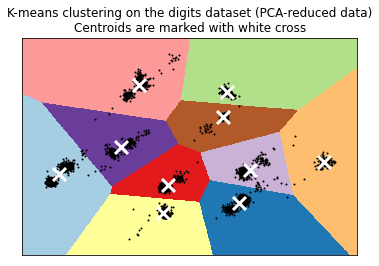

In [21]:
reduced_data = PCA(n_components=2).fit_transform(X_km_train_25)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()